In [1]:
import autorootcwd  # noqa
import joblib
import matplotlib.pyplot as plt
import numpy as np

In [50]:
rf_model = joblib.load("models/random_forest/model_20250104_010503.pkl")
rf_feature_importance = rf_model.feature_importances_
rf_feature_names = rf_model.feature_names_in_
assert rf_feature_importance.sum() == 1

{name: importance.round(2) for name, importance in zip(rf_feature_names, rf_feature_importance)}

/home/max/miniconda3/envs/nulp/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/max/miniconda3/envs/nulp/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'up_last_five': 0.39,
 'up_reorder_ratio': 0.28,
 'up_total_orders': 0.17,
 'u_dow_mode': 0.0,
 'u_avg_prd': 0.0,
 'u_total_orders': 0.03,
 'u_reorder_ratio': 0.01,
 'u_hod_mode': 0.0,
 'p_avg_cart_position': 0.03,
 'p_total_orders': 0.02,
 'p_reorder_ratio': 0.07}

In [51]:
xbg_model = joblib.load("models/xgboost/model_20250103_234328.pkl")
xbg_features_importance = xbg_model.feature_importances_
xbg_features_names = xbg_model.feature_names_in_
assert abs(xbg_features_importance.sum() - 1) < 0.01

{name: importance.round(2) for name, importance in zip(xbg_features_names, xbg_features_importance)}

{'up_last_five': 0.77,
 'up_reorder_ratio': 0.14,
 'up_total_orders': 0.03,
 'u_dow_mode': 0.0,
 'u_avg_prd': 0.0,
 'u_total_orders': 0.01,
 'u_reorder_ratio': 0.0,
 'u_hod_mode': 0.0,
 'p_avg_cart_position': 0.0,
 'p_total_orders': 0.01,
 'p_reorder_ratio': 0.03}

In [52]:
lgbm_model = joblib.load("models/lightgbm/model_20250103_235709.pkl")
lgbm_features_importance = lgbm_model.feature_importances_
lgbm_features_importance = lgbm_features_importance / lgbm_features_importance.sum()
lgbm_features_names = lgbm_model.feature_names_in_
assert lgbm_features_importance.sum() == 1

{name: importance.round(2) for name, importance in zip(lgbm_features_names, lgbm_features_importance)}

/home/max/miniconda3/envs/nulp/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.5.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


{'up_last_five': 0.08,
 'up_reorder_ratio': 0.12,
 'up_total_orders': 0.08,
 'u_dow_mode': 0.02,
 'u_avg_prd': 0.11,
 'u_total_orders': 0.14,
 'u_reorder_ratio': 0.17,
 'u_hod_mode': 0.05,
 'p_avg_cart_position': 0.04,
 'p_total_orders': 0.09,
 'p_reorder_ratio': 0.11}

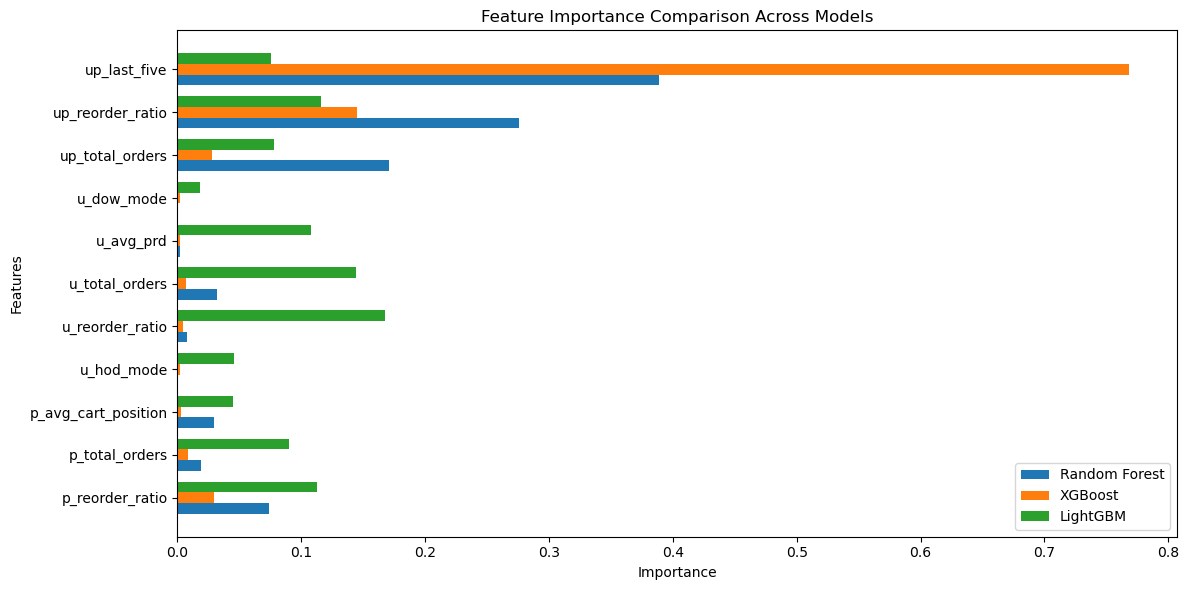

In [56]:
# Plotting
plt.figure(figsize=(12, 6))
y = np.arange(len(rf_feature_names))

bar_height = 0.25
plt.barh(y - bar_height, rf_feature_importance[::-1], height=bar_height, label='Random Forest')
plt.barh(y, xbg_features_importance[::-1], height=bar_height, label='XGBoost')
plt.barh(y + bar_height, lgbm_features_importance[::-1], height=bar_height, label='LightGBM')

# Formatting the plot
plt.yticks(y, rf_feature_names[::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Comparison Across Models')
plt.legend(loc='lower right')
plt.tight_layout()

# Save the plot as PNG
plt.savefig('assets/feature_importance_comparison.png', dpi=300)

# Show plot
plt.show()